#Вариант 7


In [ ]:
import numpy as np  
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap  
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline 

In [ ]:
# Функция для построения графиков области решений
def plot_decision_regions(X, y, classifier,  
                          resolution=0.02, test_idx=None): 
 
        # Настройка генератора маркеров и палитры 
    markers = ('s', 'x', 'o', '^', 'v') 
    colors = ('red', 'blue', 'lightgreen',  
              'gray', 'cyan') 
    cmap = ListedColormap(colors[:len(np.unique(y))]) 
 
        # Построение графика поверхности решения 
    x1_min = X[:, 0].min() - 1 
    x1_max = X[:, 0].max() + 1 
    x2_min = X[:, 1].min() - 1 
    x2_max = X[:, 1].max() + 1 
    xx1, xx2 = np.meshgrid(np.arange(x1_min,  
                           x1_max, resolution), 
                           np.arange(x2_min,  
                           x2_max, resolution)) 
 
    Z = classifier.predict(np.array([xx1.ravel(), 
                                     xx2.ravel()]).T) 
    Z = Z.reshape(xx1.shape) 
 
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap) 
    plt.xlim(xx1.min(), xx1.max()) 
    plt.ylim(xx2.min(), xx2.max()) 
    # Пометить заданные образцы точками 
    if test_idx:       # если заданы номера образцов 
        X_test = X[test_idx, :] 
        plt.scatter(X_test[:, 0], X_test[:, 1], c='w', 
        alpha=0.8, edgecolor='black', linewidths=1, 
        marker='o', s=120, label='test set') 
        # Отобразить образцы классов 
    for idx, cl in enumerate(np.unique(y)): 
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], 
                    alpha=0.8,  c=colors[idx],  
                    edgecolor='black',   
                    marker=markers[idx],  label=cl) 

Загрузим исходные данные для задачи классификации: матрицу признаков **X** и 
массив целевых меток **y**. 

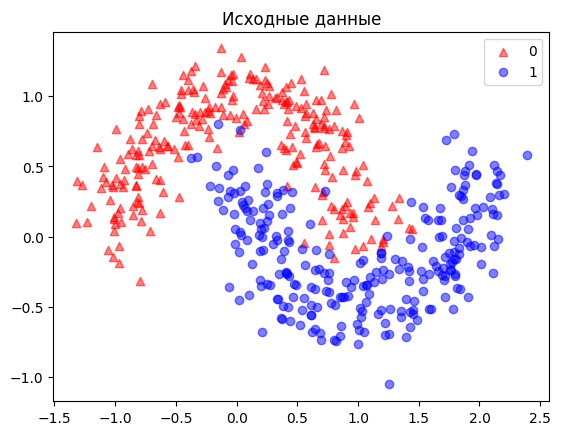

In [ ]:

from sklearn.datasets import make_moons 
X, y = make_moons(n_samples=512, random_state=123, noise=0.18) 
 
plt.figure(1) 
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5, label='0')  
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5, label='1') 
plt.legend()  
plt.title("Исходные данные") 
plt.show() 

#Создадим и обучим модель классификации на основе метода опорных векторов, использующую RBF-ядро



 Модель SVM1: 
 err_train = 0.0251 
 err_test = 0.0260


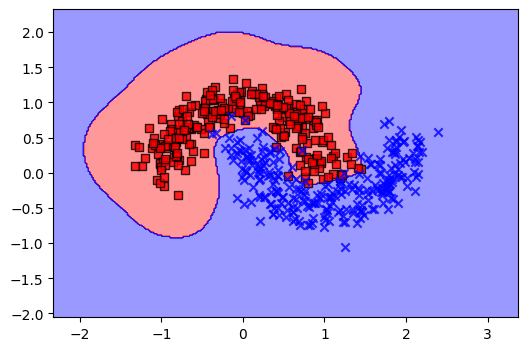

In [ ]:
 # Выделение тренировочной и тестовой выборки 
from sklearn.model_selection import train_test_split  
 
X_train, X_test, y_train, y_test = train_test_split( 
                 X, y, test_size=0.3, random_state=0) 
 
    # Создание и тренировка модели SVM 
from  sklearn.svm  import  SVC 
 
svm1  =  SVC(kernel='rbf', gamma=5, C=10)  
svm1.fit(X_train, y_train) 
 
    # Ошибки обучения 
err_train = np.mean(y_train != svm1.predict(X_train)) 
err_test  = np.mean(y_test  != svm1.predict(X_test)) 
print("\n\n Модель SVM1:", 
      "\n err_train = %.4f"  % err_train,  
      "\n err_test = %.4f"   % err_test) 
 
    
 # Постороение графика области решений 
 
X_combined = np.vstack((X_train, X_test)) 
y_combined = np.hstack((y_train, y_test)) 

 
plt.figure(figsize=(6, 4))  

plot_decision_regions(X_combined, y_combined,  
                      classifier=svm1) 

plt.show() 

Исследуем влияние гиперпараметров модели с гауссовым RBF-ядром на конфигурацию области решений



 Модель SVM2: 
 err_train = 0.1564 
 err_test = 0.1623


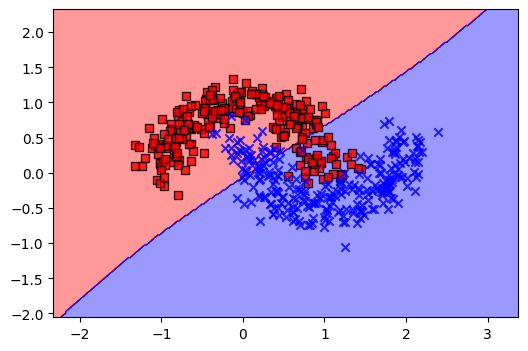

In [ ]:
 # Создание и тренировка модели SVM 

svm2  =  SVC(kernel='rbf', gamma=0.1, C=0.1)  
svm2.fit(X_train, y_train) 
 
    # Ошибки обучения 
err_train = np.mean(y_train != svm2.predict(X_train)) 
err_test  = np.mean(y_test  != svm2.predict(X_test)) 
print("\n\n Модель SVM2:", 
      "\n err_train = %.4f"  % err_train,  
      "\n err_test = %.4f"   % err_test) 
 
    
 # Постороение графика области решений 
 
X_combined = np.vstack((X_train, X_test)) 
y_combined = np.hstack((y_train, y_test)) 

 
plt.figure(figsize=(6, 4))  

plot_decision_regions(X_combined, y_combined,  
                      classifier=svm2) 

plt.show() 



 Модель SVM2: 
 err_train = 0.1061 
 err_test = 0.1104


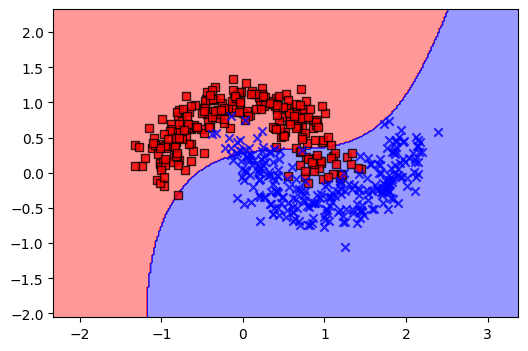

In [ ]:
 # Создание и тренировка модели SVM 

svm2  =  SVC(kernel='rbf', gamma=0.1, C=10)  
svm2.fit(X_train, y_train) 
 
    # Ошибки обучения 
err_train = np.mean(y_train != svm2.predict(X_train)) 
err_test  = np.mean(y_test  != svm2.predict(X_test)) 
print("\n\n Модель SVM2:", 
      "\n err_train = %.4f"  % err_train,  
      "\n err_test = %.4f"   % err_test) 
 
    
 # Постороение графика области решений 
 
X_combined = np.vstack((X_train, X_test)) 
y_combined = np.hstack((y_train, y_test)) 

 
plt.figure(figsize=(6, 4))  

plot_decision_regions(X_combined, y_combined,  
                      classifier=svm2) 

plt.show() 



 Модель SVM2: 
 err_train = 0.0363 
 err_test = 0.0325


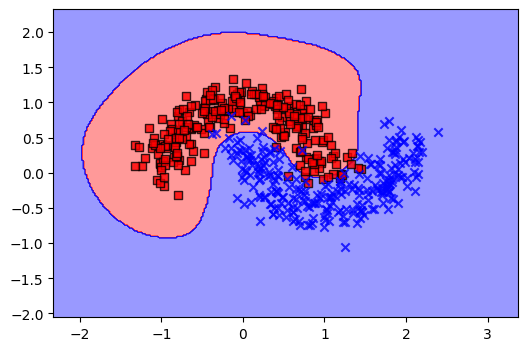

In [ ]:
# Создание и тренировка модели SVM 

svm2  =  SVC(kernel='rbf', gamma=5, C=0.1)  
svm2.fit(X_train, y_train) 
 
    # Ошибки обучения 
err_train = np.mean(y_train != svm2.predict(X_train)) 
err_test  = np.mean(y_test  != svm2.predict(X_test)) 
print("\n\n Модель SVM2:", 
      "\n err_train = %.4f"  % err_train,  
      "\n err_test = %.4f"   % err_test) 
 
    
 # Постороение графика области решений 
 
X_combined = np.vstack((X_train, X_test)) 
y_combined = np.hstack((y_train, y_test)) 

 
plt.figure(figsize=(6, 4));  

plot_decision_regions(X_combined, y_combined,  
                      classifier=svm2);

plt.show(); 

Подберем оптимальные гиперпараметры модели

In [ ]:
from sklearn.model_selection import GridSearchCV 
 
param_grid = [ { 'C': np.logspace(-3, 3, num=8),  
                 'gamma': np.logspace(-5, 2, num=8),  
                 'kernel': ['rbf'] }] 
 
svm = SVC() 
grid = GridSearchCV(svm, param_grid) 
 
grid.fit(X_train, y_train)


cvres  = grid.cv_results_ 
 
for maen_score, params in zip( 
                            cvres['mean_test_score'], 
                            cvres['params']): 
        print(maen_score,  params) 

0.5028169014084508 {'C': 0.001, 'gamma': 1e-05, 'kernel': 'rbf'}
0.5028169014084508 {'C': 0.001, 'gamma': 0.0001, 'kernel': 'rbf'}
0.5028169014084508 {'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}
0.5028169014084508 {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
0.5028169014084508 {'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}
0.5028169014084508 {'C': 0.001, 'gamma': 1.0, 'kernel': 'rbf'}
0.5028169014084508 {'C': 0.001, 'gamma': 10.0, 'kernel': 'rbf'}
0.5028169014084508 {'C': 0.001, 'gamma': 100.0, 'kernel': 'rbf'}
0.5028169014084508 {'C': 0.0071968567300115215, 'gamma': 1e-05, 'kernel': 'rbf'}
0.5028169014084508 {'C': 0.0071968567300115215, 'gamma': 0.0001, 'kernel': 'rbf'}
0.5028169014084508 {'C': 0.0071968567300115215, 'gamma': 0.001, 'kernel': 'rbf'}
0.5028169014084508 {'C': 0.0071968567300115215, 'gamma': 0.01, 'kernel': 'rbf'}
0.5028169014084508 {'C': 0.0071968567300115215, 'gamma': 0.1, 'kernel': 'rbf'}
0.5028169014084508 {'C': 0.0071968567300115215, 'gamma': 1.0, 'kernel': 'rbf'}
0.5

In [ ]:
best_params  = grid.best_params_   # Лучшие параметры 
 
print('\n best_params=', best_params) 
 
print('CV best score = ', grid.best_score_) 
print('CV error    = ', 1 - grid.best_score_) 
print('best C      = ', grid.best_estimator_.C) 
print('best gamma  = ', grid.best_estimator_.gamma) 


 best_params= {'C': 2.6826957952797246, 'gamma': 1.0, 'kernel': 'rbf'}
CV best score =  0.9636932707355242
CV error    =  0.03630672926447576
best C      =  2.6826957952797246
best gamma  =  1.0


Модель bestSVM: : kernel= rbf ; C= 2.6826957952797246 ; gamma= 1.0

 err_train =  0.036312849162011177 
 err_test =  0.01948051948051948


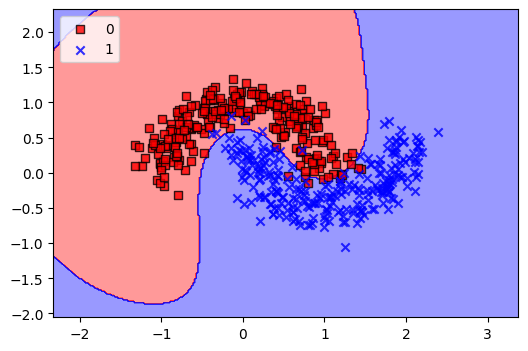

In [ ]:
svm_best = grid.best_estimator_   
 
print("Модель bestSVM:", 
      ": kernel=", svm_best.kernel,  
      "; C=",      svm_best.C,  
      "; gamma=",  svm_best.gamma) 
 
        # Модель bestSVM: : kernel = rbf;  
        #                   C = 2.6826957952797246 ; 
        #                   gamma = 1.0 
 
    # Обучение оптимизированной модели 
svm_best.fit(X_train, y_train) 
 
    # Ошибки обучения  
err_train = np.mean(y_train != svm_best.predict( 
                                         X_train)) 
err_test  = np.mean(y_test  != svm_best.predict( 
                                         X_test)) 
print("\n err_train = ", err_train,  
      "\n err_test = ", err_test) 
 
        # err_train =  0.036312849162011177 при n=8
        #err_test =  0.01948051948051948    при n=8
 
      # Постороение графика области решений 

 
X_combined = np.vstack((X_train, X_test)) 
y_combined = np.hstack((y_train, y_test)) 
    
plt.figure(figsize=(6, 4))   
plot_decision_regions(X_combined, y_combined, 
                      classifier=svm_best) 

plt.legend(loc='upper left') 
plt.show() 

#Создадим и обучим модель классификации на основе построения дерева решений


 err_train = 0.1061 
 err_test = 0.1169


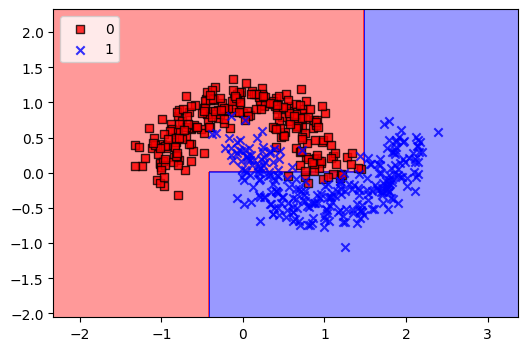

In [ ]:
 # Создание и тренировка модели  
    #                       на основе дерева решений 
    #    criterion – мера неоднородности: 
    #                ('entropy', 'gini'); 
    #    max_depth – глубина дерева решений. 
 
from sklearn.tree import DecisionTreeClassifier     
 
tree = DecisionTreeClassifier( 
                criterion='entropy', 
                max_depth=3,  random_state=0)  
 
tree.fit(X_train, y_train)      
 
 
    # Ошибки обучения  
err_train = np.mean(y_train != tree.predict(X_train)) 
err_test  = np.mean(y_test  != tree.predict(X_test)) 
print("\n err_train = %.4f"  % err_train,  
      "\n err_test = %.4f"   % err_test) 
 
    # err_train = 0.0190 
    # err_test = 0.0222 
 # Постороение графика области решений 
 

 
X_combined = np.vstack((X_train, X_test)) 
y_combined = np.hstack((y_train, y_test)) 

 

plt.figure(figsize=(6, 4)) 

 

plot_decision_regions(X_combined, y_combined,  
                      classifier=tree) 

plt.legend(loc='upper left') 
plt.show() 

Подберем оптимальные гиперпараметры для модели, так как их не так много, можем подобрать их вручную




 err_train = 0.0140 
 err_test = 0.0390


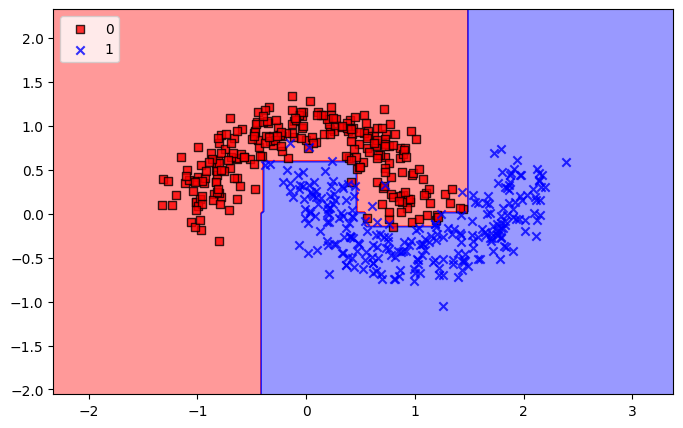

In [ ]:
 # Создание и тренировка модели  
    #                       на основе дерева решений 
    #    criterion – мера неоднородности: 
    #                ('entropy', 'gini'); 
    #    max_depth – глубина дерева решений. 
 
from sklearn.tree import DecisionTreeClassifier     
 
tree = DecisionTreeClassifier( 
                criterion='entropy', 
                max_depth=5,  random_state=0)  
 
tree.fit(X_train, y_train)      
 
 
    # Ошибки обучения  
err_train = np.mean(y_train != tree.predict(X_train)) 
err_test  = np.mean(y_test  != tree.predict(X_test)) 
print("\n err_train = %.4f"  % err_train,  
      "\n err_test = %.4f"   % err_test) 
 
    # err_train =0.0112  
    # err_test = 0.0325

 # Постороение графика области решений 
 

X_combined = np.vstack((X_train, X_test)) 
y_combined = np.hstack((y_train, y_test)) 

 

plt.figure(figsize=(8, 5)) 

 

plot_decision_regions(X_combined, y_combined,  
                      classifier=tree) 

plt.legend(loc='upper left') 
plt.show() 


 err_train = 0.0000 
 err_test = 0.0455


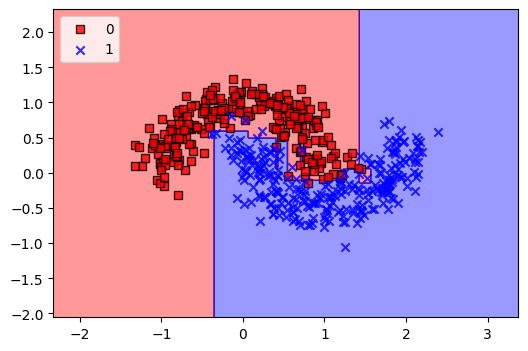

In [ ]:
# Гиперпараметрическая оптимизация
from sklearn.model_selection import GridSearchCV
param_grid=[{'max_depth':range(1,100),'criterion':['entropy']}]
tree=DecisionTreeClassifier()
grid=GridSearchCV(tree,param_grid)
grid.fit(X_train,y_train)
cvres=grid.cv_results_
best_params = grid.best_params_
# Обучение оптимизированной модели
tree.fit(X_train, y_train)      
 
    # Ошибки обучения  
err_train = np.mean(y_train != tree.predict(X_train)) 
err_test  = np.mean(y_test  != tree.predict(X_test)) 
print("\n err_train = %.4f"  % err_train,  
      "\n err_test = %.4f"   % err_test) 
 
    # err_train =0.0112  
    # err_test = 0.0325

 # Постороение графика области решений 
 
X_combined = np.vstack((X_train, X_test)) 
y_combined = np.hstack((y_train, y_test)) 

plt.figure(figsize=(6, 4)) 

plot_decision_regions(X_combined, y_combined,  
                      classifier=tree) 
plt.legend(loc='upper left') 
plt.show() 


Оптимальными гиперпараметрами явлются criterion(мера неоднородности) ='entropy' и max_depth(глубина дерева решений) = 6. Далее при увеличении глубины модель начинает переобучаться 

Проанализировав графики и полученные ошибки, можно сделать вывод, что модель, основанная на методе опорных векторов лучше подходит для решения данной задачи. А модель дерева принятия решений, хоть и неплохо справляется со своей задачей, если смотреть на ошибки, но довольно грубоватая, судя по графику, я бы попробовала здесь скорее "Случайный лес". Эта модель справится с задачей лучше "Дерева решений", но, я думаю, что впечатляющих результатов эта модель тоже не даст из-за специфики построенния области решений(параллельно осям).

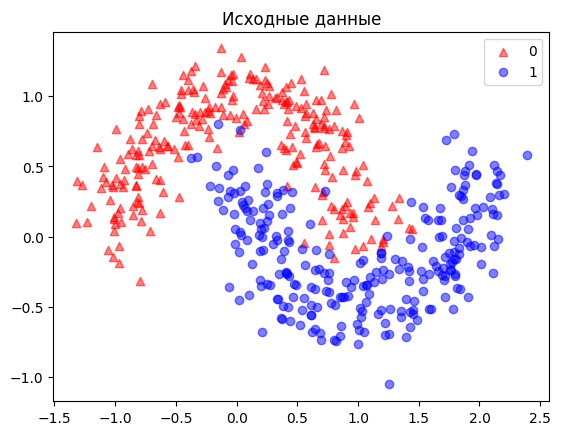

{'criterion': 'entropy', 'max_depth': 5}

 err_train =  0.0 
 err_test =  0.03896103896103896


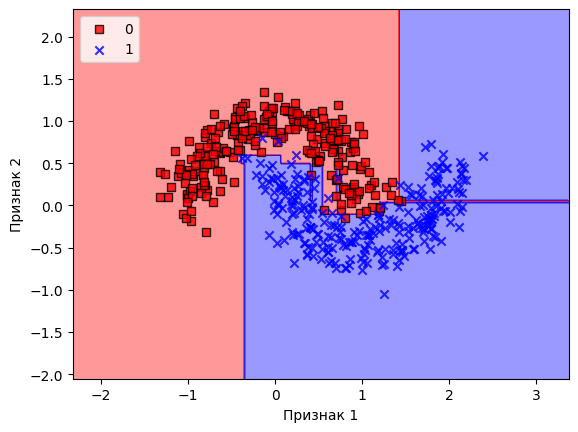

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=512, random_state=123, noise=0.18)
plt.figure(1)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5, label='1')
plt.legend()
plt.title("Исходные данные")
plt.show()
# Разделение данных на тренировочную и тестовую выборки
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
 X, y, test_size=0.3, random_state=0)
# Cоздание модели на основе дерева решений
from sklearn.tree import DecisionTreeClassifier
# Гиперпараметрическая оптимизация
from sklearn.model_selection import GridSearchCV
param_grid=[{'max_depth':range(1,100),'criterion':['entropy']}]
tree=DecisionTreeClassifier()
grid=GridSearchCV(tree,param_grid)
grid.fit(X_train,y_train)
cvres=grid.cv_results_
best_params = grid.best_params_
print(best_params)
# Обучение оптимизированной модели
tree.fit(X_train, y_train)
# Доли ошибок на обучающей и тестовой выборках
err_train = np.mean(y_train != tree.predict(X_train))
err_test = np.mean(y_test != tree.predict(X_test))
print("\n err_train = ", err_train, 
 "\n err_test = ", err_test) #Визуализация решения задачи классификации

X_combined = np.vstack((X_train, X_test));
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree)
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend(loc='upper left')
plt.show()
